<a href="https://colab.research.google.com/github/scottspurlock/csc4422-2022s/blob/main/tutorials/day02_tutorial_numpy_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 2 Tutorial: Introduction to Numpy and Matplotlib

The following tutorial contains examples of using numpy and matplotlib. The notebook is adapted from Mobasher and Tan.

## 2.1 Numpy

In [1]:
import numpy as np

In [2]:
# Creating a 1-d array

A = np.array([1,2,3,4,5])
print(A)
print(type(A))
print(A[0])
print(type(A[0]))

[1 2 3 4 5]
<class 'numpy.ndarray'>
1
<class 'numpy.int64'>


In [3]:
# Creating a 1-d array from an existing Python list

L = [1, 2, 3, 4, 5, 6]

A = np.array(L)
A

array([1, 2, 3, 4, 5, 6])

In [4]:
A / 5

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2])

In [5]:
np.array([1.0,2,3,4,5]) / 5

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [6]:
M = np.array([2, 3, 4, 5, 6, 7])

P = L * M
P

array([ 2,  6, 12, 20, 30, 42])

In [7]:
P.sum()

112

In [8]:
P.mean()

18.666666666666668

In [9]:
print(P.min())
print(P.max())


2
42


In [10]:
# Creating a 2-d array

X = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(X)
print(X.shape) # No parentheses - shape is not a function
print('Rows:', X.shape[0])
print('Columns:', X.shape[1])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)
Rows: 3
Columns: 3


In [11]:
# Transpose a 2-d array

X.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [12]:
# Array slicing

X[1,2]

6

In [13]:
# All the rows, column 1
X[:,1]

array([2, 5, 8])

In [14]:
# Row 0, all the columns
X[0,:]

array([1, 2, 3])

In [15]:
# From Row 1 on, from column 1 on
X[1:,1:]

array([[5, 6],
       [8, 9]])

In [16]:
# From row 1 on, Column 0 to 1 (end index not inclusive)
X[1:,0:2]

array([[4, 5],
       [7, 8]])

In [17]:
# Using arrays to index into other arrays (e.g., Boolean masks)

A = np.array([1, 2, 3, 4, 5, 6, 7])

A > 3

array([False, False, False,  True,  True,  True,  True])

In [18]:
# Count how many True's there are using sum
mask = A > 3
mask.sum()

4

In [19]:
# Keep only elements where A > 3
mask = A > 3
B = A[mask]
B

array([4, 5, 6, 7])

In [20]:
# Combine two masks with logical AND to get a range
mask = (A > 1) & (A < 6)
print(mask)
A[mask]

[False  True  True  True  True False False]


array([2, 3, 4, 5])

### Using masks to find NaN
numpy uses a special value, nan, to indicate "not a number." We often want to find nan values to either remove or fill in.


In [21]:
# Make up some data
A = np.random.rand(4, 2)

# corrupt the data with nan values
A[0, 1] = np.nan
A[2, 0] = np.nan

A

array([[0.453299  ,        nan],
       [0.85961183, 0.97998805],
       [       nan, 0.66879925],
       [0.20303907, 0.5142126 ]])

In [22]:
# The nan values keep us from being able to sum up the data
A.sum(axis=0)

array([nan, nan])

In [23]:
# The isnan function tells us which values are nan
np.isnan(A)

array([[False,  True],
       [False, False],
       [ True, False],
       [False, False]])

In [24]:
# One option is to drop all the rows that have a nan value.
# First we can make a mask that's true for any row that has a nan.
drop_rows = np.isnan(A).any(axis=1)
print(drop_rows)

# Then we can invert the mask with the not operator ~
keep_rows = ~drop_rows
clean_data = A[keep_rows]
print()
print(clean_data)

[ True False  True False]

[[0.85961183 0.97998805]
 [0.20303907 0.5142126 ]]


In [25]:
# Another option is to replace nan values with a specific value, like 0

# Original data
print(A)
print()

B = A.copy()
B[np.isnan(A)] = 0
print(B)

[[0.453299          nan]
 [0.85961183 0.97998805]
 [       nan 0.66879925]
 [0.20303907 0.5142126 ]]

[[0.453299   0.        ]
 [0.85961183 0.97998805]
 [0.         0.66879925]
 [0.20303907 0.5142126 ]]


In [26]:
# Another option is to replace nan values with the mean

# Original data
print(A)
print()

# Finding the mean of just the actual numbers
print(np.nanmean(A, axis=0))
print()

# Converting nan values to the column mean
print(np.nan_to_num(A, nan=np.nanmean(A, axis=0)))

[[0.453299          nan]
 [0.85961183 0.97998805]
 [       nan 0.66879925]
 [0.20303907 0.5142126 ]]

[0.50531663 0.72099997]

[[0.453299   0.72099997]
 [0.85961183 0.97998805]
 [0.50531663 0.66879925]
 [0.20303907 0.5142126 ]]


### Finding duplicates

In [27]:
np.unique([1, 1, 1, 2, 2, 2, 3])

array([1, 2, 3])

In [28]:
# Finding how many times each value occurs with return_counts=True
unique_vals, counts = np.unique([1, 1, 1, 2, 2, 2, 3], return_counts=True)
print('unique values:', unique_vals)
print('counts:       ', counts)

unique values: [1 2 3]
counts:        [3 3 1]


In [29]:
# Finding unique rows with axis=0
a = np.array([[1, 0, 0], 
              [1, 0, 0], 
              [2, 3, 4]])
np.unique(a, axis=0)


array([[1, 0, 0],
       [2, 3, 4]])

In [30]:
# Finding how many times each row occurs with return_counts=True
a = np.array([[1, 0, 0], 
              [1, 0, 0], 
              [2, 3, 4]])
unique_vals, counts = np.unique(a, axis=0, return_counts=True)

print('unique values:')
print(unique_vals)
print('counts:')
print(counts)

unique values:
[[1 0 0]
 [2 3 4]]
counts:
[2 1]


### There are several ways to create numpy arrays.

In [31]:
print(np.zeros((2,3)))        # a 2 x 3 matrix of zeros
print(np.ones((3,2)))         # a 3 x 2 matrix of ones


[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [32]:
print(np.random.rand(5))      # random numbers from a uniform distribution between [0,1]
print(np.random.randn(5))     # random numbers from a normal distribution
print(np.arange(-10,10,2))    # array of ints from -10 to 8, by 2s
print(np.arange(12).reshape(3,4))  # reshape to a matrix
print(np.linspace(0,1,10))    # split interval [0,1] into 10 equally separated values

[0.79919889 0.48248674 0.82923754 0.70746102 0.35465052]
[ 0.32172874 -1.28667455  0.86001836 -0.51575291 -0.71937537]
[-10  -8  -6  -4  -2   0   2   4   6   8]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


### We can also use numpy to write and read in text files.

In [33]:
# Make some random data
A = np.random.rand(4, 2)
print(A)

# Save the data as a text file (tab-delimited by default, or we can specify)
np.savetxt('numbers.csv', A, delimiter=',')

# Read text file back in
B = np.loadtxt('numbers.csv', delimiter=',')

# Sometimes we want to skip the first row if the file has a header line
B = np.loadtxt('numbers.csv', delimiter=',', skiprows=1)
print(B)

[[0.97614767 0.11258976]
 [0.93746878 0.00944699]
 [0.62319947 0.33703183]
 [0.35596817 0.84557331]]
[[0.93746878 0.00944699]
 [0.62319947 0.33703183]
 [0.35596817 0.84557331]]


## 2.2 Matplotlib

In [34]:
import matplotlib.pyplot as plt

### Plotting

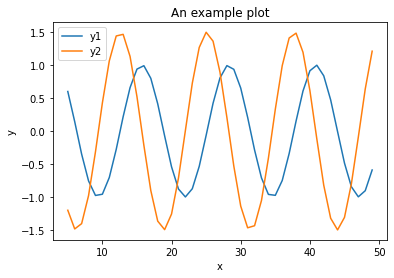

In [35]:
# Make up some data
x = np.arange(5, 50)
y1 = np.sin(x/2)
y2 = 1.5 * np.cos(x / 2)

plt.plot(x, y1, label='y1')
plt.plot(x, y2, label='y2')
plt.legend( ('y1', 'y2') )
plt.ylabel('y')
plt.xlabel('x')
plt.title('An example plot')
plt.show()

### Histograms

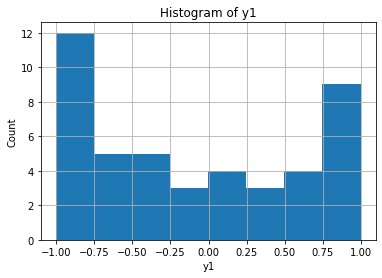

In [36]:
plt.hist(y1, bins=8)
plt.xlabel('y1')
plt.ylabel('Count')
plt.title('Histogram of y1')
plt.grid(True)
plt.show()

### Scatter plots

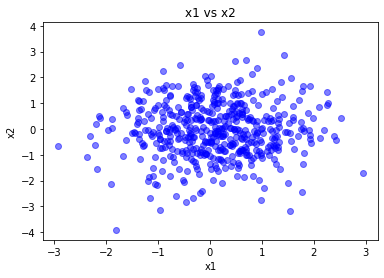

In [37]:
x1 = np.random.randn(500)
x2 = np.random.randn(500)
# alpha controls how "see-through" data points are
plt.scatter(x1, x2, marker='o', color='b', alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('x1 vs x2')
plt.show()


### Bar plots

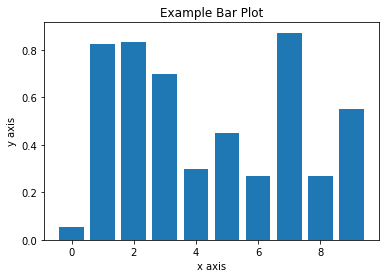

In [38]:
x = np.arange(10)
y = np.random.rand(10)
plt.bar(x, y)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Example Bar Plot')
plt.show()


### Box plots

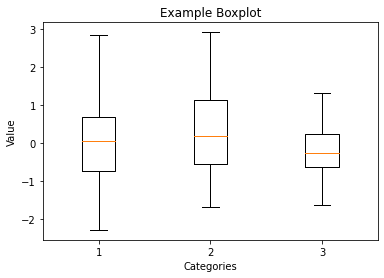

In [39]:
x1 = np.random.randn(100)
x2 = 1.1 * np.random.randn(100) + 0.2
x3 = 0.6 * np.random.randn(100) - 0.2
plt.boxplot([x1, x2, x3])
plt.xlabel('Categories')
plt.ylabel('Value')
plt.title('Example Boxplot')
plt.show()